In [2]:
from unet import UNet
import torch
import matplotlib.pyplot as plt
import cv2

In [3]:
model = UNet(n_class=6)

(1807, 591, 3)


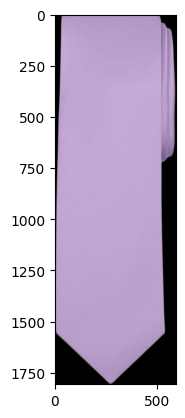

In [4]:
img = cv2.imread('/Users/sdale/repos/find_my_tie/dataset_v0.1/417jT+cOi+L._AC_SX679_.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

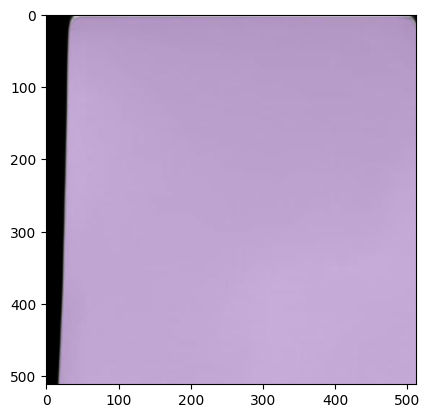

In [5]:
N = 512
img = img[:N, :N]
plt.imshow(img)

In [20]:
x = torch.tensor(img).permute(2, 0, 1).unsqueeze(0).float()
x = x / 255.0
x.shape, x.max()
# x = torch.ones((1, 3, N, N))

(torch.Size([1, 3, 512, 512]), tensor(0.9804))

In [21]:
out, color_out = model(x)
out.shape, color_out.shape

(torch.Size([1, 6, 512, 512]), torch.Size([1, 18]))

In [22]:
from torch.nn.functional import softmax

In [23]:
softmax_out = softmax(out, dim=1)
softmax_out.shape

torch.Size([1, 6, 512, 512])

In [24]:
softmax_out[0, :, 0, 0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [31]:
out_img = torch.zeros((softmax_out.size(0), 3, N, N))
for i in range(6):
    weights = softmax_out[:, i, :, :]
    weights = weights.reshape(-1, 1, N, N)
    weights = weights.expand(-1, 3, N, N)
    color = color_out[:, i*3:i*3+3]
    color = color.reshape(-1, 3, 1, 1)
    color = color.expand(-1, 3, N, N)
    out_img = out_img + weights * color

In [33]:
out_img.shape

torch.Size([1, 3, 512, 512])

In [34]:
x.shape, out_img.shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 3, 512, 512]))

In [35]:
loss = torch.nn.functional.mse_loss(x, out_img)

In [36]:
loss

tensor(0.0688, grad_fn=<MseLossBackward0>)